In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [82]:
df_charging = pd.read_pickle("data/charging_modified.pkl")

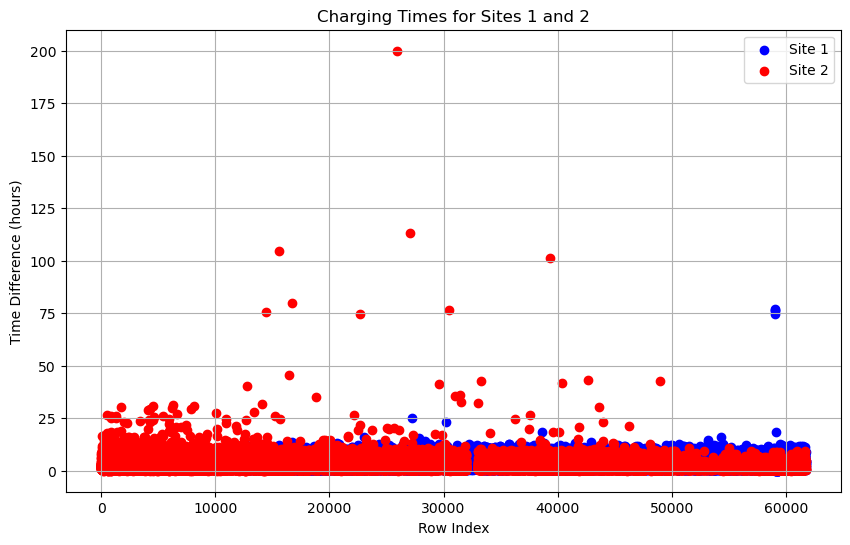

In [83]:
# Plot the time differences for site 1 in blue and site 2 in red
plt.figure(figsize=(10, 6))

# Plot time differences for site 1 (blue)
plt.scatter(df_charging[df_charging['siteID'] == '1'].index, df_charging[df_charging['siteID'] == '1']['ChargingTimeHours'], color='blue', label='Site 1')

# Plot time differences for site 2 (red)
plt.scatter(df_charging[df_charging['siteID'] == '2'].index, df_charging[df_charging['siteID'] == '2']['ChargingTimeHours'], color='red', label='Site 2')

plt.title('Charging Times for Sites 1 and 2')
plt.xlabel('Row Index')
plt.ylabel('Time Difference (hours)')
plt.legend()
plt.grid(True)
plt.show()

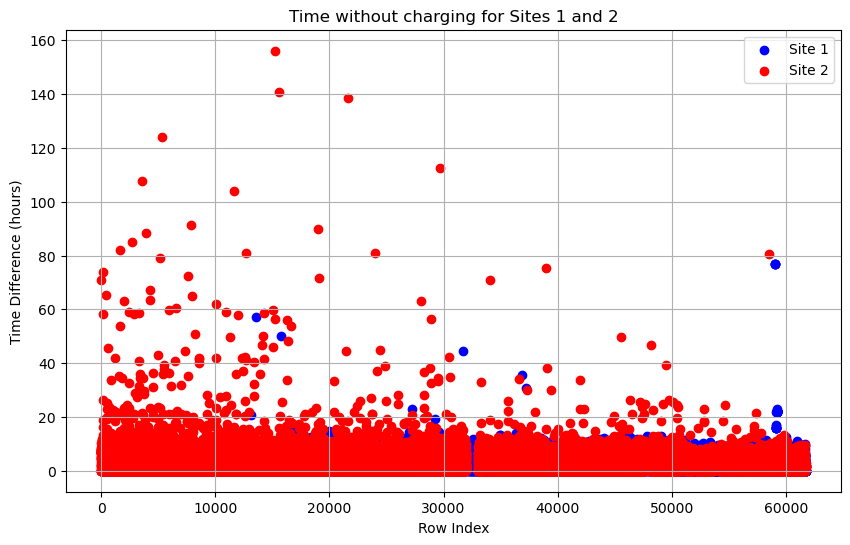

In [84]:
# Plot the time differences for station 1 in blue and station 2 in red
plt.figure(figsize=(10, 6))

# Plot time differences for station 1 (blue)
plt.scatter(df_charging[df_charging['siteID'] == '1'].index, df_charging[df_charging['siteID'] == '1']['NoChargingTimeHours'], color='blue', label='Site 1')

# Plot time differences for station 2 (red)
plt.scatter(df_charging[df_charging['siteID'] == '2'].index, df_charging[df_charging['siteID'] == '2']['NoChargingTimeHours'], color='red', label='Site 2')

plt.title('Time without charging for Sites 1 and 2')
plt.xlabel('Row Index')
plt.ylabel('Time Difference (hours)')
plt.legend()
plt.grid(True)
plt.show()

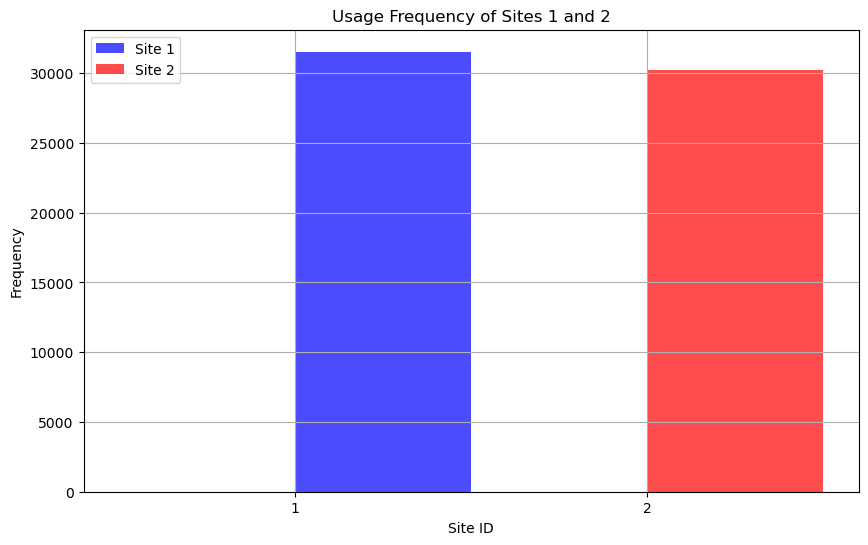

In [85]:
# Plot a histogram for the usage frequency of each site
plt.figure(figsize=(10, 6))

# Plot histogram for station 1
plt.hist(df_charging[df_charging['siteID'] == '1']['siteID'], histtype='stepfilled', bins=2, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for station 2
plt.hist(df_charging[df_charging['siteID'] == '2']['siteID'], histtype='stepfilled', bins=2, color='red', alpha=0.7, label='Site 2')

plt.title('Usage Frequency of Sites 1 and 2')
plt.xlabel('Site ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

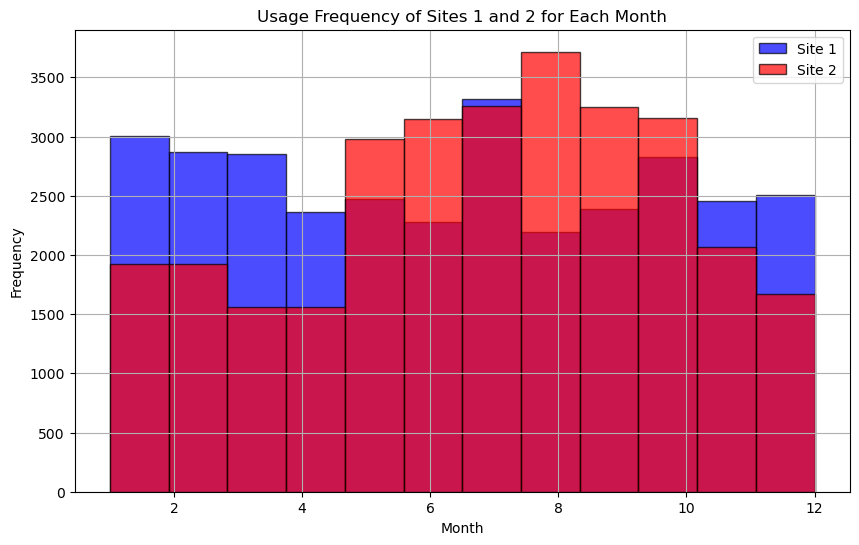

In [86]:
# Plot the usage frequency of sites for every month
plt.figure(figsize=(10, 6))

# Plot histogram for station 1
plt.hist(df_charging[df_charging['siteID'] == '1']['month'], edgecolor='k', bins=12, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for station 2
plt.hist(df_charging[df_charging['siteID'] == '2']['month'], edgecolor='k', bins=12, color='red', alpha=0.7, label='Site 2')

plt.title('Usage Frequency of Sites 1 and 2 for Each Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Count how many unregistered users used station in site 1
df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].isnull())]['id'].count()

2084

In [88]:
# Count how many unregistered users used station in site 2
df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].isnull())]['id'].count()

14097

In [89]:
# Count how many registered users used station in site 1
df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].notnull())]['id'].count()

29445

In [90]:
# Count how many registered users used station in site 2
df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].notnull())]['id'].count()

16105

In [91]:
# Count how many unregistered users used station generally
df_charging[df_charging['userID'].isnull()]['id'].count()

16181

In [92]:
# Count how many registered users used station generally
df_charging[df_charging['userID'].notnull()]['id'].count()

45550

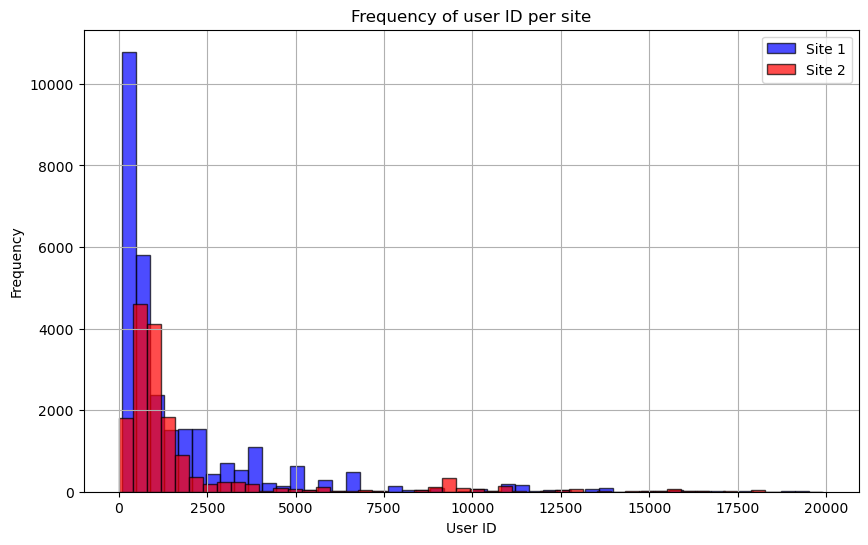

In [93]:
# Plot a histogram for the usage frequency of each userID per site
plt.figure(figsize=(10, 6))

# Plot histogram for site 1
plt.hist(df_charging[df_charging['siteID'] == '1']['userID'], edgecolor='k', bins=50, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for site 2
plt.hist(df_charging[df_charging['siteID'] == '2']['userID'], edgecolor='k', bins=50, color='red', alpha=0.7, label='Site 2')

plt.title('Frequency of user ID per site')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### NOTES FOR SITE CHARACTERISTICS: 
1) Site 2 has more entries with extremely large charging and (especially) non-charging times than Site 1
-
2) Site 2 has much more entries with no user ID and input (= unregistered users) than Site 1
3) Site 2 has less entries with User ID and input (= registered users) than Site 1
4) Site 1 has much more entries with registered users than unregistered users
5) Site 2 has slightly more entries with registered users than unregistered, but relativley similar
6) Generally much more entries with registered users than unregistered users
-
7) Site 2 with slightly less entries than Site 1, but relatively similar (usage frequency)
8) Site 2 has less entries than Site 1 in winter, March, April, July and November (especially January, Feburary, March, December)
9) Site 2 has more entries than Site 1 in May, June, August, September, October (especially August)
* ATTENTION WITH 8) AND 9): Gap in Fall 2020, could possibly be misleading
-
10) Site 2 has less repeats in user IDs than Site 1 (--> one registered user, who frequently uses these stations, is more likely to use one on site 1)
-
* Initial assumption --> Site 1 is private (open to employees), Site 2 is public (university)